In [1]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import time


In [2]:
#Test class for points bounded by a rectangle.
def Points_in_square(square, num_points):
  points = []

  x_coordinates, y_coordinates = zip(*square)
  min_x, min_y, max_x, max_y  = min(x_coordinates), min(y_coordinates), max(x_coordinates), max(y_coordinates)

  for _ in range(num_points):
    x = np.random.uniform(min_x, max_x)
    y = np.random.uniform(min_x, max_x)
    points.append([x,y])
  return points

In [3]:
#Test class for points bounded by a circle.
def Points_in_circle(r, x_center, y_center, num_points):
  points = []

  for _ in range(num_points):
      radius = r * math.sqrt(random.random())
      theta = 2 * math.pi * random.random()
      x = x_center + radius * math.cos(theta)
      y = y_center + radius * math.sin(theta)
      points.append([x, y])
  return points

In [4]:
def Points_exponential(num_points, min_range, max_range):
  points = []

  for _ in range(num_points):
    x = np.random.uniform(min_range, max_range)
    y = -math.pow(x, 2)
    points.append([x,y])
  return points

In [5]:
def Plot_hull(points, UH):
  arr_points = np.array(points)
  arr_UH = np.array(UH)
  plt.scatter(arr_points[:,0], arr_points[:,1], color='blue')
  plt.scatter(arr_UH[:,0], arr_UH[:,1],color='red')
  plt.show()

In [15]:
#Part B Gift Wrapping
def GIFT_CH(points):
  q1 = min(points)
  CH = [q1]
  P = [q1]
  poh = None
  i = 0

  if q1 == points[0]:
    print("Changed index!")
    index = 1
  else:
    index = 0

  while True:
    end = points[index]
    if i != 0:
      P.append(poh)
    for j in range(len(points)):
      if end == poh:
        end = points[j]
      elif sidedness(P[i], end, points[j]):
        end = points[j]
    poh = end
    CH.append(end)
    if end[0] == q1[0] and end[1] == q1[1]:
      break
    else:
      i += 1
  return CH

def sidedness(p1, p2, p3):
  fun = lambda x : x > 0
  sign = p1[0]*(p2[1] - p3[1]) + p2[0]*(p3[1]-p1[1])+p3[0]*(p1[1] - p2[1])
  return fun(sign)



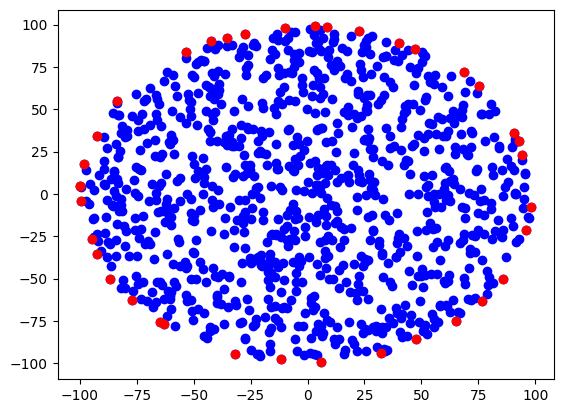

In [16]:
#Test for Gift wrapping with circle test class
points = Points_in_circle(100, 0, 0, 1000)

UH = GIFT_CH(points)

Plot_hull(points, UH)

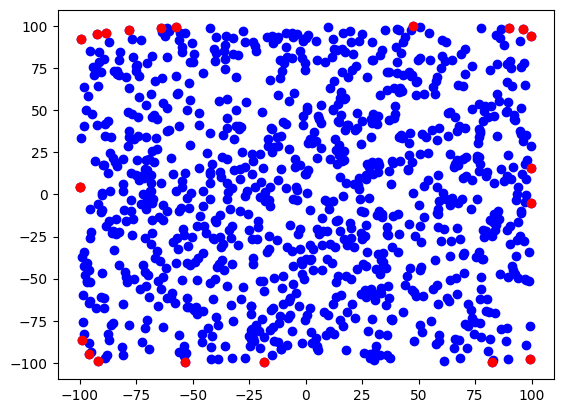

In [17]:
#Test for Gift Wrapping with square test class
x_min, y_min, x_max, y_max = -100,-100, 100, 100
square = [[x_min, y_min],[x_max, y_max]]
points = Points_in_square(square, 1000)

UH = GIFT_CH(points)

Plot_hull(points, UH)

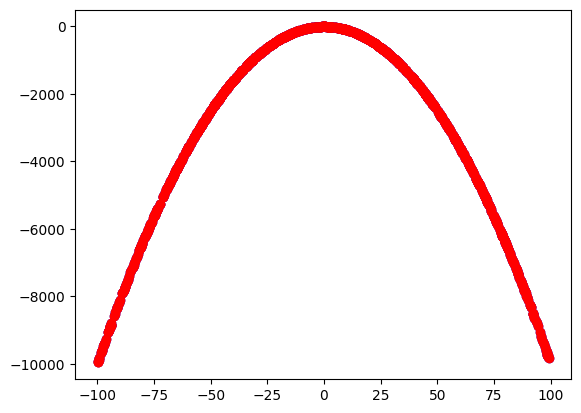

In [18]:
#Test for Gift Wrapping with exponential test class
points = Points_exponential(1000, -100, 100)

UH = GIFT_CH(points)

Plot_hull(points, UH)